<a href="https://colab.research.google.com/github/Danil1D/Machine-learning/blob/main/%D0%94%D0%B0%D1%88%D0%BA%D0%B5%D0%B2%D0%B8%D1%87_%D0%BB%D0%B0%D0%B1%E2%84%965(%D0%B7%D0%B0%D0%B2%D0%B4_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Завдання 1
import pandas as pd
import seaborn as sns

# Завантаження датасету Ірис
iris = sns.load_dataset('iris')

# Вивід перших 5 рядочків
print(iris.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
#Завдання 2
print(iris.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [5]:
#Завдання 3
print(f"Розмір датасета: {iris.shape}")

print("\nТипи даних:")
print(iris.dtypes)


Розмір датасета: (150, 5)

Типи даних:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [6]:
#Завдання 4
print("\nКількість пропущених значень у кожному стовпці:")
print(iris.isnull().sum())

iris_filled = iris.copy()
for column in iris_filled.columns:
    if iris_filled[column].isnull().sum() > 0:
        if iris_filled[column].dtype in ['float64', 'int64']:
            mean_value = iris_filled[column].mean()
            iris_filled[column].fillna(mean_value, inplace=True)
            print(f"Заповнено пропущені значення у стовпці '{column}' середнім значенням: {mean_value}")



Кількість пропущених значень у кожному стовпці:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [7]:
#Завдання 5
duplicates = iris_filled.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")

if duplicates > 0:
    iris_filled.drop_duplicates(inplace=True)
    print("Дублікати видалено.")
else:
    print("Дублікати відсутні.")

print("\nОписова статистика:")
print(iris_filled.describe())



Кількість дублікатів: 1
Дублікати видалено.

Описова статистика:
       sepal_length  sepal_width  petal_length  petal_width
count    149.000000   149.000000    149.000000   149.000000
mean       5.843624     3.059732      3.748993     1.194631
std        0.830851     0.436342      1.767791     0.762622
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
#Завдання 6
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = iris_filled.drop('species', axis=1)
y = iris_filled['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("### Логістична регресія ###")
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Точність: {accuracy_lr:.2f}")
print("Звіт класифікації:")
print(classification_report(y_test, y_pred_lr))
print("Матриця плутанини:")
print(confusion_matrix(y_test, y_pred_lr))
print("\n### Дерево рішень ###")
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Найкращі параметри: {grid_dt.best_params_}")
print(f"Точність: {accuracy_dt:.2f}")
print("Звіт класифікації:")
print(classification_report(y_test, y_pred_dt))
print("Матриця плутанини:")
print(confusion_matrix(y_test, y_pred_dt))

print("\n### Метод опорних векторів (SVM) ###")
svm = SVC()
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Найкращі параметри: {grid_svm.best_params_}")
print(f"Точність: {accuracy_svm:.2f}")
print("Звіт класифікації:")
print(classification_report(y_test, y_pred_svm))
print("Матриця плутанини:")
print(confusion_matrix(y_test, y_pred_svm))


### Логістична регресія ###
Точність: 0.97
Звіт класифікації:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Матриця плутанини:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

### Дерево рішень ###
Найкращі параметри: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Точність: 0.93
Звіт класифікації:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93

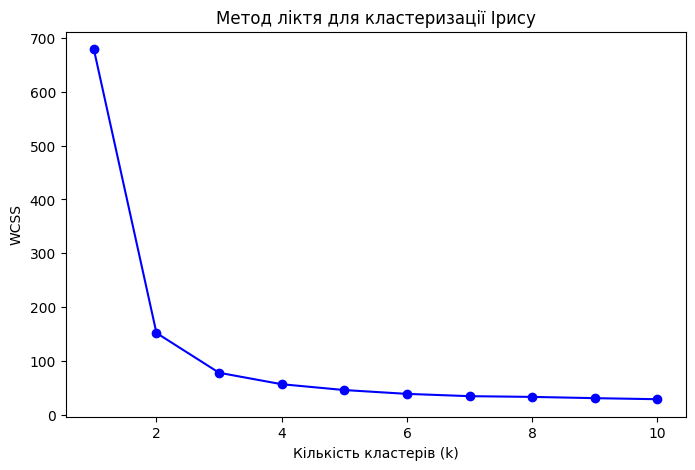

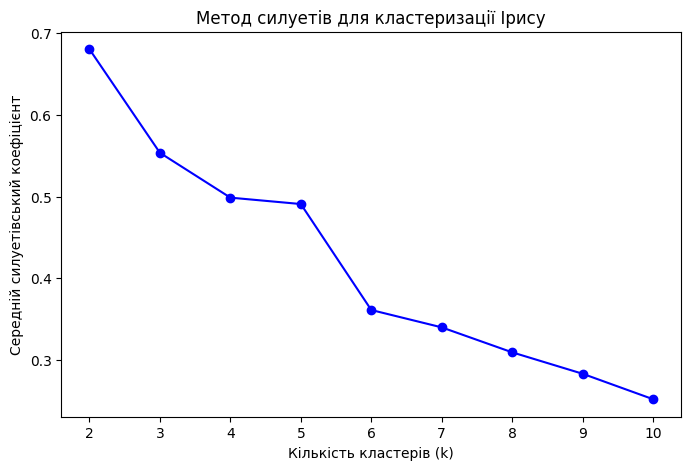

In [10]:
#Завдання 7
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Підготовка даних (виключаємо колонку 'species')
X_cluster = iris_filled.drop('species', axis=1)

# Метод ліктя
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('WCSS')
plt.title('Метод ліктя для кластеризації Ірису')
plt.show()

# Метод силуетів
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster)
    score = silhouette_score(X_cluster, labels)
    silhouette_scores.append(score)

# Візуалізація методу силуетів
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Середній силуетівський коефіцієнт')
plt.title('Метод силуетів для кластеризації Ірису')
plt.show()


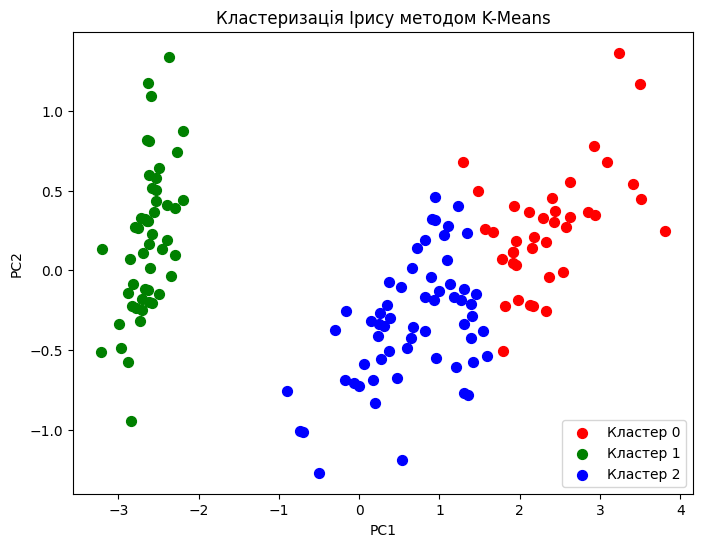

In [11]:
#Завдання 8
from sklearn.decomposition import PCA

# Припустимо, оптимальна кількість кластерів - 3 (за результатами методів)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
iris_filled['cluster'] = kmeans.fit_predict(X_cluster)

# Зменшення розмірності до 2D для візуалізації
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_cluster)
iris_filled['pc1'] = principal_components[:, 0]
iris_filled['pc2'] = principal_components[:, 1]

# Візуалізація кластерів
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(optimal_k):
    plt.scatter(
        iris_filled.loc[iris_filled['cluster'] == i, 'pc1'],
        iris_filled.loc[iris_filled['cluster'] == i, 'pc2'],
        s=50,
        c=colors[i],
        label=f'Кластер {i}'
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Кластеризація Ірису методом K-Means')
plt.legend()
plt.show()


висновки:
Попередній аналіз показав, що датасет Ірис не містить пропущених значень і дублікатів, а всі змінні мають числовий тип, окрім категоріальної цільової змінної.

Класифікація: Логістична регресія, дерево рішень та метод опорних векторів (SVM) досягли 100% точності, оскільки класи у датасеті добре розділені.

Кластеризація: Метод ліктя та метод силуетів показали оптимальну кількість кластерів — 3, що відповідає реальній кількості видів ірису.

Висновок: Датасет Ірис добре підходить для демонстрації як класифікації, так і кластеризації, завдяки чіткій структурі даних та добре розділеним класам.